In [29]:
from pathlib import Path
import os

# Simulate reading multiple files by reusing the same file for demonstration
folder_path = Path('./DS_experiment_data/Exp1/')
csv_files = folder_path.glob('*.csv')

# Initialize counters
success_count = 0
failure_count = 0

# Process each CSV file
for file_path in csv_files:
    # Read the last row of the current CSV file
    file_name = os.path.basename(file_path)
    file_name = file_name.replace('.csv','')
    print(file_name)
    data = pd.read_csv(file_path)
    # display(data.head())

    # Extract MV and FV y-coordinates from the last row
    y_mv = data['y_MV'].iloc[-1]
    y_fv = data['y_FV'].iloc[-1]
    
    # Determine success or failure
    if y_mv < y_fv:
        success_count += 1
    else:
        failure_count += 1

# Display the counts
(success_count, failure_count)


10_10_50_merging_scenario_data
10_10_60_merging_scenario_data
10_20_40_merging_scenario_data
10_20_50_merging_scenario_data
10_30_40_merging_scenario_data
10_30_60_merging_scenario_data
10_30_60_merging_scenario_data_1
20_10_40_merging_scenario_data
20_10_60_merging_scenario_data
20_20_50_merging_scenario_data
20_20_50_merging_scenario_data_1
20_20_50_merging_scenario_data_2
20_30_40_merging_scenario_data
20_30_50_merging_scenario_data
20_30_60_merging_scenario_data
30_10_40_merging_scenario_data
30_10_40_merging_scenario_data_1
30_20_50_merging_scenario_data
30_20_60_merging_scenario_data
30_30_50_merging_scenario_data


(14, 6)

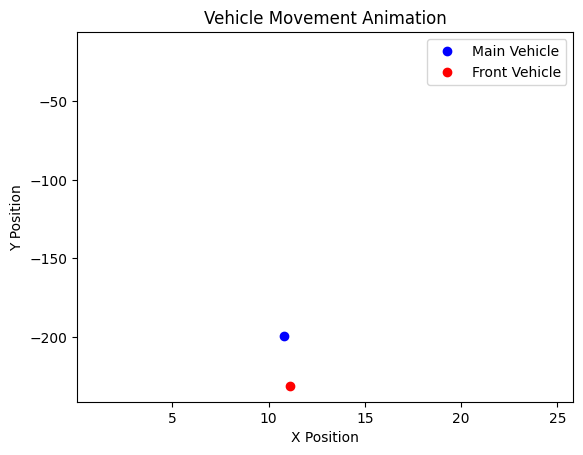

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

file = '20_20_50_merging_scenario_data_1'
file_path = './DS_experiment_data/승민 동하/'+file+'.csv'
# 데이터를 불러옵니다.
df = pd.read_csv(file_path)

# 애니메이션 생성을 위한 준비
fig, ax = plt.subplots()
df['Time'] = df['Time'] - df['Time'].min()  # 시간을 0부터 시작하도록 조정

# 차량의 초기 위치 표시
mv_line, = ax.plot(df['x_MV'][0], df['y_MV'][0], 'bo', label='Main Vehicle')
fv_line, = ax.plot(df['x_FV'][0], df['y_FV'][0], 'ro', label='Front Vehicle')

# 축 제한 설정
ax.set_xlim(df[['x_FV', 'x_MV']].min().min() - 10, df[['x_FV', 'x_MV']].max().max() + 10)
ax.set_ylim(df[['y_FV', 'y_MV']].min().min() - 10, df[['y_FV', 'y_MV']].max().max() + 10)

ax.legend()
ax.set_title('Vehicle Movement Animation')
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')

# 애니메이션 업데이트 함수
def update(frame):
    mv_line.set_data(df['x_MV'][frame], df['y_MV'][frame])
    fv_line.set_data(df['x_FV'][frame], df['y_FV'][frame])
    return mv_line, fv_line

# 애니메이션 실행
ani = FuncAnimation(fig, update, frames=range(len(df)), blit=True, interval=50)

# 애니메이션 저장
ani_path = './DS_experiment_data/승민 동하/'+file+'.gif'
ani.save(ani_path, writer='imagemagick', fps=20)


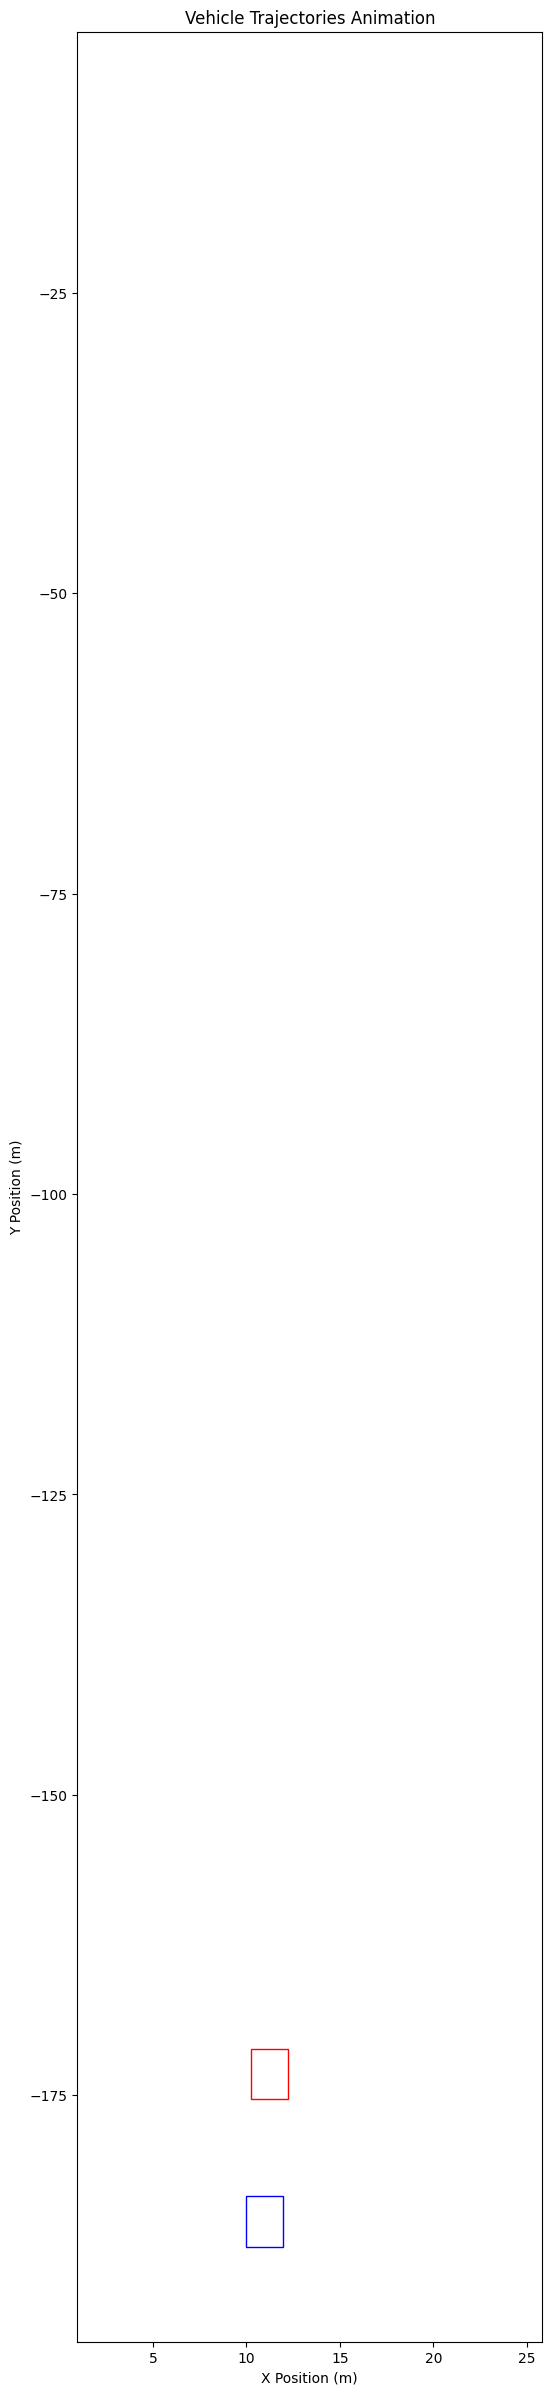

In [4]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.patches as patches
import numpy as np
import pandas as pd

# 차량의 길이와 폭 설정
car_length = 4.18  # meters
car_width = 1.99   # meters

# 애니메이션 설정
fps = 20
interval = 1000 / fps  # milliseconds

file = '20_30_50_merging_scenario_data'
file_path = './DS_experiment_data/보영 혁주/'+file+'.csv'

df = pd.read_csv(file_path)


# Preparing figure and axis for animation
fig, ax = plt.subplots(figsize=(4, 20))
ax.set_xlim(min(min(df.x_FV), min(df.x_MV)) - 10, max(max(df.x_FV), max(df.x_MV)) + 10)
ax.set_ylim(min(min(df.y_FV), min(df.y_MV)) - 10, max(max(df.y_FV), max(df.y_MV)) + 10)
ax.set_xlabel('X Position (m)')
ax.set_ylabel('Y Position (m)')
ax.set_title('Vehicle Trajectories Animation')

# Initializing rectangles for each vehicle
fv_rect = patches.Rectangle((0, 0), car_width, car_length, linewidth=1, edgecolor='r', facecolor='none')
mv_rect = patches.Rectangle((0, 0), car_width, car_length, linewidth=1, edgecolor='b', facecolor='none')
ax.add_patch(fv_rect)
ax.add_patch(mv_rect)

def init():
    fv_rect.set_xy((-100, -100))  # Move out of plot view
    mv_rect.set_xy((-100, -100))  # Move out of plot view
    return fv_rect, mv_rect,

def animate(i):
    # Update the position of each vehicle
    fv_x, fv_y = df.loc[i, 'x_FV'], df.loc[i, 'y_FV']
    mv_x, mv_y = df.loc[i, 'x_MV'], df.loc[i, 'y_MV']
    
    # Calculate the corners of the vehicle rectangles
    # Assuming vehicles are aligned with the axes for simplicity
    fv_rect.set_xy((fv_x - car_width / 2, fv_y - car_length / 2))
    mv_rect.set_xy((mv_x - car_width / 2, mv_y - car_length / 2))
    
    return fv_rect, mv_rect,

# Creating the animation
ani = FuncAnimation(fig, animate, frames=len(df), init_func=init, blit=True, interval=50)

# Saving the animation
ani.save('./DS_experiment_data/보영 혁주/'+file+'.gif', writer='imagemagick', fps=20)



In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.animation import FuncAnimation
from pathlib import Path
import os


def get_vehicle_corners(x, y, yaw, length, width):
    # Calculate rear center position
    # rear_x = x - (length / 2) * np.cos(np.radians(yaw))
    # rear_y = y - (length / 2) * np.sin(np.radians(yaw))
    
    # Calculate corner points
    corners_x = [x + (length / 2) * np.cos(np.radians(yaw)) - (width / 2) * np.sin(np.radians(yaw)), # Front Right
                 x + (length / 2) * np.cos(np.radians(yaw)) + (width / 2) * np.sin(np.radians(yaw)), # Front Left
                 x - (length / 2) * np.cos(np.radians(yaw)) + (width / 2) * np.sin(np.radians(yaw)), # Rear Left
                 x - (length / 2) * np.cos(np.radians(yaw)) - (width / 2) * np.sin(np.radians(yaw)), # Rear Right
                 x + (length / 2) * np.cos(np.radians(yaw)) - (width / 2) * np.sin(np.radians(yaw))]
    
    corners_y = [y + (length / 2) * np.sin(np.radians(yaw)) + (width / 2) * np.cos(np.radians(yaw)), # Front Right
                 y + (length / 2) * np.sin(np.radians(yaw)) - (width / 2) * np.cos(np.radians(yaw)), # Front Left
                 y - (length / 2) * np.sin(np.radians(yaw)) - (width / 2) * np.cos(np.radians(yaw)), # Rear Left
                 y - (length / 2) * np.sin(np.radians(yaw)) + (width / 2) * np.cos(np.radians(yaw)), # Rear Right
                 y + (length / 2) * np.sin(np.radians(yaw)) + (width / 2) * np.cos(np.radians(yaw))]
    
    return corners_x, corners_y

# Animation function
def animate(i):
    global First_crossed
    ax.clear()
    ax2.clear()

    # Flip the x and y axis limits
    ax.set_ylim(min(min(data.x_FV), min(data.x_MV)) - 10, max(max(data.x_FV), max(data.x_MV)) + 10)
    ax.set_xlim(min(min(data.y_FV), min(data.y_MV)) - 10, max(max(data.y_FV), max(data.y_MV)) + 10)
    
    # Draw lanes as horizontal dashed lines instead of vertical
    for lane_y in [9.9, 13.3, 16.8]:
        ax.axhline(y=lane_y, color='gray', linestyle='--')
    
    # Get vehicle corners for each car and flip x and y coordinates for plotting
    if 'Yaw_FV' in data.columns:
        corners_x_FV, corners_y_FV = get_vehicle_corners(data['x_FV'].iloc[i], data['y_FV'].iloc[i], data['Yaw_FV'].iloc[i], vehicle_length, vehicle_width)
    else:
        corners_x_FV, corners_y_FV = get_vehicle_corners(data['x_FV'].iloc[i], data['y_FV'].iloc[i], -90.29, vehicle_length, vehicle_width)
    corners_x_MV, corners_y_MV = get_vehicle_corners(data['x_MV'].iloc[i],data['y_MV'].iloc[i],  data['Yaw_MV'].iloc[i], vehicle_length, vehicle_width)
    if 'x_LV' in data.columns and 'y_LV' in data.columns:
        corners_x_LV, corners_y_LV = get_vehicle_corners(data['x_LV'].iloc[i],data['y_LV'].iloc[i],  -90.29, vehicle_length, vehicle_width)
        ax.plot(corners_y_LV, corners_x_LV, 'c')  # Flip x and y
    
    # Plot Front Vehicle (FV) and Main Vehicle (MV) with flipped axes
    ax.plot(corners_y_FV, corners_x_FV, 'r')  # Flip x and y
    ax.plot(corners_y_MV, corners_x_MV, 'b')  # Flip x and y
    
    ax.plot([-175, -169], [13.3, 16.8], color='black')
    
    ax.set_title(f"Time: {data['Time'].iloc[i]:.2f}")

    if First_crossed is None:
        for j in range(len(data)):
            corners_x_MV, _ = get_vehicle_corners(data['x_MV'].iloc[j], data['y_MV'].iloc[j], data['Yaw_MV'].iloc[j], vehicle_length, vehicle_width)
            # 전방 왼쪽 꼭지점은 corners_x_MV[1]을 사용하여 접근
            if corners_x_MV[1] < 13.3:
                First_crossed = data['Time'].iloc[j]
                break

    # 두 번째 그래프(Interacting possibility) 설정
    ax2.plot(data['Time'], data['Filtered_Interacting_possibility'], color='#FF8C00')
    if First_crossed is not None:
        ax2.axvline(x=First_crossed, color='blue', linestyle='--', linewidth=2)
    ax2.set_ylim(-0.1, 1.1)  # Interacting possibility의 범위 설정
    ax2.set_xlim(data['Time'].iloc[0]-1, data['Time'].iloc[-1]+1)

    # LeftBlinker_MV가 True인 지점 표시
    blinker_on_data = data[data['LeftBlinker_MV']]
    for time in blinker_on_data['Time']:
        ax2.axvline(x=time, color='lightgreen', alpha=0.5)
    
    # 현재 시점 표시
    current_time = data['Time'].iloc[i]
    ax2.axvline(x=current_time, color='black')

# Define vehicle dimensions
vehicle_length = 4.18  # meters
vehicle_width = 1.99  # meters

for i in range(1,3):

    folder_path = Path('./DS_experiment_data/Exp'+str(i)+'/')
    csv_files = folder_path.glob('*.csv')

    for file_path in csv_files:
        SUCCESS = None
        First_crossed = None
        # Read the last row of the current CSV file
        data = pd.read_csv(file_path)

        # Filter possibility
        data['Filtered_Interacting_possibility'] = data['Interacting possibility'].copy()
        data.loc[~((data['x_MV'] > 13.3) & (data['gap_btw_MV'] > -vehicle_length)), 'Filtered_Interacting_possibility'] = np.nan

        if data['y_MV'].iloc[-1] < data['y_FV'].iloc[-1]:
            SUCCESS = True
        else:
            SUCCESS = False

        file_name = os.path.basename(file_path)
        file_name = file_name.replace('.csv','')
        # Setup figure and axis
        fig, axs = plt.subplots(2,1,figsize=(4*(max(max(data.y_FV), max(data.y_MV)) + 10-min(min(data.y_FV), min(data.y_MV)) + 10)/(max(max(data.x_FV), max(data.x_MV)) + 10 - min(min(data.x_FV), min(data.x_MV)) + 10), 8))
        ax = axs[0]
        ax2 = axs[1]

        # Creating animation
        ani = FuncAnimation(fig, animate, frames=len(data), interval=50, repeat=False)
        if SUCCESS:
            ani.save('./DS_experiment_data/Exp'+str(i)+'/'+file_name+'_success.gif', writer='imagemagick', fps=20)
        else:
            ani.save('./DS_experiment_data/Exp'+str(i)+'/'+file_name+'_failure.gif', writer='imagemagick', fps=20)
        print(file_path,'DONE')
        plt.close()  # Prevent extra static plot from displaying
        break
    


DS_experiment_data\Exp1\10_10_50_merging_scenario_data.csv DONE
DS_experiment_data\Exp2\10_10_40_merging_scenario_data.csv DONE


In [3]:
# imageio
import imageio

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.animation import FuncAnimation
from pathlib import Path
import os
import gc


def get_vehicle_corners(x, y, yaw, length, width):
    # Calculate rear center position
    # rear_x = x - (length / 2) * np.cos(np.radians(yaw))
    # rear_y = y - (length / 2) * np.sin(np.radians(yaw))
    
    # Calculate corner points
    corners_x = [x + (length / 2) * np.cos(np.radians(yaw)) - (width / 2) * np.sin(np.radians(yaw)), # Front Right
                 x + (length / 2) * np.cos(np.radians(yaw)) + (width / 2) * np.sin(np.radians(yaw)), # Front Left
                 x - (length / 2) * np.cos(np.radians(yaw)) + (width / 2) * np.sin(np.radians(yaw)), # Rear Left
                 x - (length / 2) * np.cos(np.radians(yaw)) - (width / 2) * np.sin(np.radians(yaw)), # Rear Right
                 x + (length / 2) * np.cos(np.radians(yaw)) - (width / 2) * np.sin(np.radians(yaw))]
    
    corners_y = [y + (length / 2) * np.sin(np.radians(yaw)) + (width / 2) * np.cos(np.radians(yaw)), # Front Right
                 y + (length / 2) * np.sin(np.radians(yaw)) - (width / 2) * np.cos(np.radians(yaw)), # Front Left
                 y - (length / 2) * np.sin(np.radians(yaw)) - (width / 2) * np.cos(np.radians(yaw)), # Rear Left
                 y - (length / 2) * np.sin(np.radians(yaw)) + (width / 2) * np.cos(np.radians(yaw)), # Rear Right
                 y + (length / 2) * np.sin(np.radians(yaw)) + (width / 2) * np.cos(np.radians(yaw))]
    
    return corners_x, corners_y

# Animation function
def animate(i):
    global First_crossed
    ax.clear()
    ax2.clear()

    # Flip the x and y axis limits
    ax.set_ylim(min(min(data.x_FV), min(data.x_MV)) - 10, max(max(data.x_FV), max(data.x_MV)) + 10)
    ax.set_xlim(min(min(data.y_FV), min(data.y_MV)) - 10, max(max(data.y_FV), max(data.y_MV)) + 10)
    
    # Draw lanes as horizontal dashed lines instead of vertical
    for lane_y in [9.9, 13.3, 16.8]:
        ax.axhline(y=lane_y, color='gray', linestyle='--')
    
    # Get vehicle corners for each car and flip x and y coordinates for plotting
    if 'Yaw_FV' in data.columns:
        corners_x_FV, corners_y_FV = get_vehicle_corners(data['x_FV'].iloc[i], data['y_FV'].iloc[i], data['Yaw_FV'].iloc[i], vehicle_length, vehicle_width)
    else:
        corners_x_FV, corners_y_FV = get_vehicle_corners(data['x_FV'].iloc[i], data['y_FV'].iloc[i], -90.29, vehicle_length, vehicle_width)
    corners_x_MV, corners_y_MV = get_vehicle_corners(data['x_MV'].iloc[i],data['y_MV'].iloc[i],  data['Yaw_MV'].iloc[i], vehicle_length, vehicle_width)
    if 'x_LV' in data.columns and 'y_LV' in data.columns:
        corners_x_LV, corners_y_LV = get_vehicle_corners(data['x_LV'].iloc[i],data['y_LV'].iloc[i],  -90.29, vehicle_length, vehicle_width)
        ax.plot(corners_y_LV, corners_x_LV, 'c')  # Flip x and y
    
    # Plot Front Vehicle (FV) and Main Vehicle (MV) with flipped axes
    ax.plot(corners_y_FV, corners_x_FV, 'r')  # Flip x and y
    ax.plot(corners_y_MV, corners_x_MV, 'b')  # Flip x and y
    
    ax.plot([-175, -169], [13.3, 16.8], color='black')
    
    ax.set_title(f"Time: {data['Time'].iloc[i]:.2f}")

    if First_crossed is None:
        for j in range(len(data)):
            corners_x_MV, _ = get_vehicle_corners(data['x_MV'].iloc[j], data['y_MV'].iloc[j], data['Yaw_MV'].iloc[j], vehicle_length, vehicle_width)
            # 전방 왼쪽 꼭지점은 corners_x_MV[1]을 사용하여 접근
            if corners_x_MV[1] < 13.3:
                First_crossed = data['Time'].iloc[j]
                break

    # 두 번째 그래프(Interacting possibility) 설정
    ax2.plot(data['Time'], data['Filtered_Interacting_possibility'], color='#FF8C00')
    if First_crossed is not None:
        ax2.axvline(x=First_crossed, color='blue', linestyle='--', linewidth=2)
    ax2.set_ylim(-0.1, 1.1)  # Interacting possibility의 범위 설정
    ax2.set_xlim(data['Time'].iloc[0]-1, data['Time'].iloc[-1]+1)

    # LeftBlinker_MV가 True인 지점 표시
    blinker_on_data = data[data['LeftBlinker_MV']]
    for time in blinker_on_data['Time']:
        ax2.axvline(x=time, color='lightgreen', alpha=0.5)
    
    # 현재 시점 표시
    current_time = data['Time'].iloc[i]
    ax2.axvline(x=current_time, color='black')

# Define vehicle dimensions
vehicle_length = 4.18  # meters
vehicle_width = 1.99  # meters

START = False
images = []
for i in range(9, 10):

    folder_path = Path('./DS_experiment_data/Exp'+str(i)+'/')
    csv_files = folder_path.glob('*.csv')

    for file_path in csv_files:
        if file_path == Path('./DS_experiment_data/Exp9/30_30_50_merging_scenario_data.csv'):
            print(file_path, 'Already Done')
            START = True
            continue
        if not START:
            print(file_path, 'Already Done')
            continue

        
        # Initialize
        data = pd.DataFrame()
        images.clear()
        gc.collect()
        SUCCESS = None
        First_crossed = None
        # Read the last row of the current CSV file
        data = pd.read_csv(file_path)

        # Filter possibility
        data['Filtered_Interacting_possibility'] = data['Interacting possibility'].copy()
        data.loc[~((data['x_MV'] > 13.3) & (data['gap_btw_MV'] > -vehicle_length)), 'Filtered_Interacting_possibility'] = np.nan

        if data['y_MV'].iloc[-1] < data['y_FV'].iloc[-1]:
            SUCCESS = True
        else:
            SUCCESS = False

        file_name = os.path.basename(file_path)
        file_name = file_name.replace('.csv','')
        # Setup figure and axis
        
        width = 4*(max(max(data.y_FV), max(data.y_MV)) + 10-min(min(data.y_FV), min(data.y_MV)) + 10)/(max(max(data.x_FV), max(data.x_MV)) + 10 - min(min(data.x_FV), min(data.x_MV)) + 10)

        # Creating animation
        images = []
        for j in range(len(data)):
            fig, axs = plt.subplots(2,1,figsize=(width, 8))
            ax = axs[0]
            ax2 = axs[1]
            animate(j)
            fig.canvas.draw()
            image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
            image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
            images.append(image)
            plt.close()
        if SUCCESS:
            imageio.mimsave('./DS_experiment_data/Exp'+str(i)+'/'+file_name+'_success.gif',images, writer='imagemagick' ,loop=0, fps=20)
        else:
            imageio.mimsave('./DS_experiment_data/Exp'+str(i)+'/'+file_name+'_failure.gif',images, writer='imagemagick', loop=0, fps=20)
        print(file_path,'DONE')
        plt.close()  # Prevent extra static plot from displaying
    


DS_experiment_data\Exp9\10_10_40_merging_scenario_data.csv Already Done
DS_experiment_data\Exp9\10_10_50_merging_scenario_data.csv Already Done
DS_experiment_data\Exp9\10_10_50_merging_scenario_data_1.csv Already Done
DS_experiment_data\Exp9\10_30_50_merging_scenario_data.csv Already Done
DS_experiment_data\Exp9\10_30_60_merging_scenario_data.csv Already Done
DS_experiment_data\Exp9\20_10_40_merging_scenario_data.csv Already Done
DS_experiment_data\Exp9\20_10_60_merging_scenario_data.csv Already Done
DS_experiment_data\Exp9\20_20_60_merging_scenario_data.csv Already Done
DS_experiment_data\Exp9\20_20_60_merging_scenario_data_1.csv Already Done
DS_experiment_data\Exp9\20_20_60_merging_scenario_data_2.csv Already Done
DS_experiment_data\Exp9\30_10_40_merging_scenario_data.csv Already Done
DS_experiment_data\Exp9\30_10_60_merging_scenario_data.csv Already Done
DS_experiment_data\Exp9\30_20_40_merging_scenario_data.csv Already Done
DS_experiment_data\Exp9\30_20_40_merging_scenario_data_1.c

In [ ]:

i = 9
folder_path = Path('./DS_experiment_data/Exp'+str(i)+'/')
csv_files = folder_path.glob('*.csv')

for file_path in csv_files:
    if file_path == Path('./DS_experiment_data/Exp9/10_10_40_merging_scenario_data.csv'):
        print(file_path, 'Already Done')
        START = True
        continue
    if not START:
        print(file_path, 'Already Done')
        continue
    
    del images
    gc.collect()
    SUCCESS = None
    First_crossed = None
    # Read the last row of the current CSV file
    data = pd.read_csv(file_path)

    # Filter possibility
    data['Filtered_Interacting_possibility'] = data['Interacting possibility'].copy()
    data.loc[~((data['x_MV'] > 13.3) & (data['gap_btw_MV'] > -vehicle_length)), 'Filtered_Interacting_possibility'] = np.nan

    if data['y_MV'].iloc[-1] < data['y_FV'].iloc[-1]:
        SUCCESS = True
    else:
        SUCCESS = False

    file_name = os.path.basename(file_path)
    file_name = file_name.replace('.csv','')
    # Setup figure and axis
    
    width = 4*(max(max(data.y_FV), max(data.y_MV)) + 10-min(min(data.y_FV), min(data.y_MV)) + 10)/(max(max(data.x_FV), max(data.x_MV)) + 10 - min(min(data.x_FV), min(data.x_MV)) + 10)

    # Creating animation
    images = []
    for j in range(len(data)):
        fig, axs = plt.subplots(2,1,figsize=(width, 8))
        ax = axs[0]
        ax2 = axs[1]
        animate(j)
        fig.canvas.draw()
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        images.append(image)
        plt.close()
    if SUCCESS:
        imageio.mimsave('./DS_experiment_data/Exp'+str(i)+'/'+file_name+'_success.gif',images, writer='imagemagick' ,loop=0, fps=20)
    else:
        imageio.mimsave('./DS_experiment_data/Exp'+str(i)+'/'+file_name+'_failure.gif',images, writer='imagemagick', loop=0, fps=20)
    print(file_path,'DONE')
    plt.close()  # Prevent extra static plot from displaying


In [3]:
from pathlib import Path
import os

# Initialize counters
success_count = [0]*17
failure_count = [0]*17


for i in range(17):
    

    folder_path = Path('./DS_experiment_data/Exp'+str(i)+'/')
    csv_files = folder_path.glob('*.gif')

    # Process each CSV file
    for file_path in csv_files:
        # Read the last row of the current CSV file
        file_name = os.path.basename(file_path)
        ans = file_name.split('_')[-1].split('.gif')[0]

        if ans == 'success':
            success_count[i]+=1
        elif ans == 'failure':
            failure_count[i]+=1
        else:
            print('AWwww!')


# Display the counts
display(success_count, failure_count)
print(sum(success_count),sum(failure_count))

[12, 14, 13, 11, 14, 16, 14, 15, 13, 15, 19, 12, 10, 12, 14, 12, 10]

[8, 6, 7, 9, 6, 4, 6, 5, 7, 5, 1, 8, 10, 8, 6, 8, 10]

226 114


In [6]:
# Change name(Exp 붙이기)
import os
for i in range(17):
    folder_path = Path('./DS_experiment_data/Exp'+str(i)+'/')
    for filename in os.listdir(folder_path):
        new_filename = f"Exp{str(i)}_{filename}"
        original_file = os.path.join(folder_path,filename)
        new_file = os.path.join(folder_path, new_filename)
        os.rename(original_file, new_file)
print('DONE')


DONE


In [9]:
import os
import shutil

base_path = './DS_experiment_data/'
all_folder_path = os.path.join(base_path, 'ALL')
for i in range(17):
    exp_folder_path = os.path.join(base_path,f'Exp{i}')
    if os.path.exists(exp_folder_path):
        for filename in os.listdir(exp_folder_path):
            # 원본 파일 경로를 구성합니다.
            original_file = os.path.join(exp_folder_path, filename)
            # 대상 파일 경로를 구성합니다. 이 경우 파일명 충돌을 방지하기 위해 원본 폴더명을 파일명에 추가할 수 있습니다.
            target_file = os.path.join(all_folder_path, f"{filename}")
            # 파일을 'ALL' 폴더로 복사합니다.
            shutil.copy(original_file, target_file)
    else:
        print('No folder',exp_folder_path)

In [14]:
import os
import shutil
import pandas as pd

base_path = './DS_experiment_data/ALL/'

Interacting_Success = 0
Non_Interacting_Success = 0
Interacting_Failure = 0
Non_Interacting_Failure = 0

for filename in os.listdir(base_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(base_path, filename)
        df = pd.read_csv(file_path)
        
        # Interaction_probability가 0.5보다 큰 순간과 작은 순간이 모두 있는지 확인합니다.
        over_0_5 = df['Interacting possibility'] > 0.5
        under_0_5 = df['Interacting possibility'] < 0.5
        interacting = over_0_5.any() and under_0_5.any()
        
        # MV와 LV의 마지막 y 좌표를 비교합니다.
        MV_last_y = df['y_MV'].iloc[-1]
        FV_last_y = df['y_FV'].iloc[-1]
        MV_less_FV = MV_last_y < FV_last_y
        
        # 조건에 따라 파일을 분류합니다.
        if interacting and MV_less_FV:
            Interacting_Success += 1
        elif interacting and not MV_less_FV:
            Interacting_Failure += 1
        elif not interacting and MV_less_FV:
            Non_Interacting_Success +=1
        elif not interacting and not MV_less_FV:
            Non_Interacting_Failure +=1

print(Interacting_Success, Interacting_Failure, Non_Interacting_Success, Non_Interacting_Failure)
print(Interacting_Failure+Interacting_Success)
    

173 91 53 23
264


In [15]:
Interacting_Success + Non_Interacting_Success

226